<a href="https://colab.research.google.com/github/shruthimohan03/video-summarizer/blob/main/GMM_for_Extractive_Summarization_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity
import re
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
# Step 1: Load and preprocess the text file
def load_and_preprocess(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    # Split text into sentences based on periods or question marks
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', content)
    # Clean sentences (keep full stops, remove other punctuations, and strip extra spaces)
    sentences = [
        re.sub(r'[^a-zA-Z0-9\s\.]', '', sentence).strip() for sentence in sentences if sentence.strip()
    ]
    return sentences

In [ ]:
# Step 2: Preprocess and vectorize sentences
def preprocess_and_vectorize(sentences):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    sentence_vectors = tfidf_vectorizer.fit_transform(sentences).toarray()
    return sentence_vectors

In [ ]:
# Step 3: Fit GMM
def fit_gmm(sentence_vectors, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(sentence_vectors)
    labels = gmm.predict(sentence_vectors)
    return labels

In [ ]:
# Step 4: Extract representative sentences and view all sentences in each cluster
def extract_summary_and_view_clusters(sentences, sentence_vectors, labels):
    summary = []
    clusters = {}
    unique_labels = np.unique(labels)

    for label in unique_labels:
        # Get indices of sentences in the current cluster
        cluster_indices = np.where(labels == label)[0]

        # Group sentences in clusters
        clusters[label] = [sentences[i] for i in cluster_indices]

        # Find the most central sentence in the cluster
        cluster_center = np.mean(sentence_vectors[cluster_indices], axis=0)
        central_index = cluster_indices[np.argmax(cosine_similarity([cluster_center], sentence_vectors[cluster_indices])[0])]
        summary.append(sentences[central_index])

    return ''.join(summary), clusters

Finding the optimal number of clusters using Elbow Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

def plot_elbow_method(sentence_vectors, max_clusters=20):
    distortions = []
    cluster_range = range(10, max_clusters + 1)

    for k in cluster_range:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(sentence_vectors)

        # Use the negative log-likelihood as a distortion measure
        distortions.append(-gmm.score(sentence_vectors))

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, distortions, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Negative Log-Likelihood')
    plt.title('Elbow Method for Optimal Clusters')
    plt.show()

    return distortions

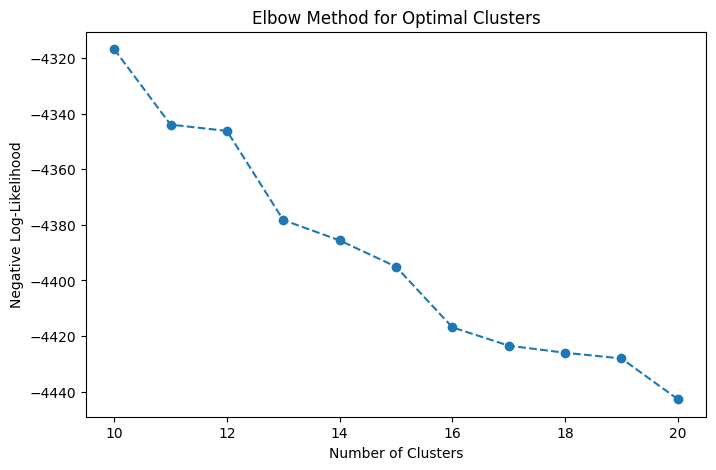

[-4316.796039684687,
 -4343.924669219889,
 -4346.189964849506,
 -4378.250821597226,
 -4385.589003002968,
 -4395.046495989373,
 -4416.856969690405,
 -4423.452299643228,
 -4426.003613744617,
 -4428.061133953519,
 -4442.719915693036]

In [ ]:
# Example
file_path = '/content/transcribed_text_nptel_video_1.txt'
sentences = load_and_preprocess(file_path)
sentence_vectors = preprocess_and_vectorize(sentences)

# Plot elbow method to find the optimal number of clusters
plot_elbow_method(sentence_vectors)

In [ ]:
# Example
file_path = '/content/transcribed_text_nptel_video_1.txt'
sentences = load_and_preprocess(file_path)
sentence_vectors = preprocess_and_vectorize(sentences)

n_clusters = 5 # can take 6 too
labels = fit_gmm(sentence_vectors, n_clusters)
summary,clusters = extract_summary_and_view_clusters(sentences, sentence_vectors, labels)

# Print sentences in each cluster
for cluster_id, cluster_sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in cluster_sentences:
        print(f"  - {sentence}")
    print()

Cluster 0:
  - So in text processing if we face this kind of problem in nearly every simple task that we are doing.
  - Now so the idea is very simple.
  - So in general my classifiers that I will build can be some rules that I write by hand some simple iftenelse rules.
  - Let us see can we build a simple rulebased classifier
  - So we will start with the example of a simple decision tree.
  - So I can have this simple iftenelse kind of decision tree here.
  - So this is very very simple if then as rules.
  - So as you have seen this is a simple if then else statement.
  - So suppose I give you a simple sentence here I have a can opener but I cannot open these cans.
  - So one question I have is whether I treated as simple fill land as it is fill lands or I converted to fill lands by removing the first of it.
  - So this looks again a simple problem but we will see it is not that simple.
  - So let us say this is a simple single sentence in Sanskrit but this is a huge this looks like 

In [ ]:
summary

'So this looks again a simple problem but we will see it is not that simple.Not the sentence is what the words.There are two classes end of the sentence or not end of the sentence.So now what happens if I am taking a language like Chinese or Japanese.We also do some sort of case folding that is we can reduce all that as to lower case.'

In [ ]:
# Save the summarized text to a file
with open("gmm_centroid_method_nptel_transcription.txt", "w") as file:
    file.write(summary)

print("Summarization completed.")

Summarization completed.


The Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) are commonly used to select the best cluster number for GMM.

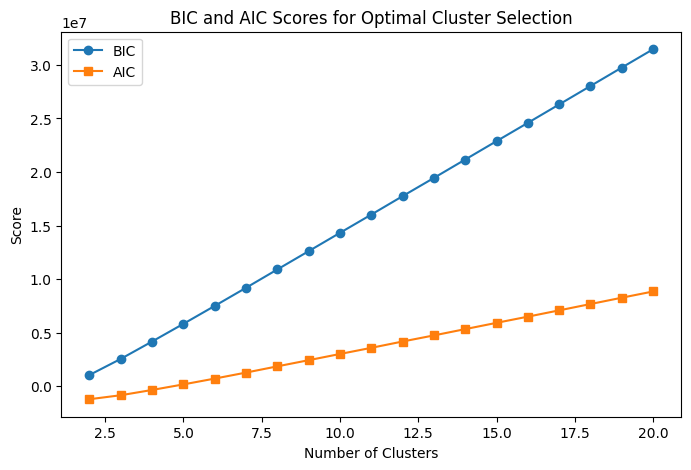

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

def compute_bic_aic(data, max_clusters=20):
    bics, aics = [], []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))
        aics.append(gmm.aic(data))

    return bics, aics, cluster_range

# Example
file_path = '/content/transcribed_text_nptel_video_1.txt'
sentences = load_and_preprocess(file_path)
sentence_vectors = preprocess_and_vectorize(sentences)
bics, aics, cluster_range = compute_bic_aic(sentence_vectors)

# Plot BIC and AIC
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, bics, label="BIC", marker='o')
plt.plot(cluster_range, aics, label="AIC", marker='s')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.title("BIC and AIC Scores for Optimal Cluster Selection")
plt.show()


In [ ]:
import pandas as pd

# Assuming `bics` and `aics` contain the computed scores
cluster_range = range(2, 21)  # Adjust as per your data
df = pd.DataFrame({"Clusters": cluster_range, "BIC": bics, "AIC": aics})

# Find the minimum BIC and AIC
optimal_bic = df.loc[df['BIC'].idxmin()]
optimal_aic = df.loc[df['AIC'].idxmin()]

print("Optimal cluster (BIC):", optimal_bic)
print("Optimal cluster (AIC):", optimal_aic)


Optimal cluster (BIC): Clusters    2.000000e+00
BIC         1.049359e+06
AIC        -1.212623e+06
Name: 0, dtype: float64
Optimal cluster (AIC): Clusters    2.000000e+00
BIC         1.049359e+06
AIC        -1.212623e+06
Name: 0, dtype: float64


GMM MODEL WITH BERT EMBEDDINGS

In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity
import re
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
# Step 1: Load and preprocess the text file
def load_and_preprocess(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    # Split text into sentences based on periods or question marks
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', content)
    # Clean sentences (keep full stops, remove other punctuations, and strip extra spaces)
    sentences = [
        re.sub(r'[^a-zA-Z0-9\s\.]', '', sentence).strip() for sentence in sentences if sentence.strip()
    ]
    return sentences

In [ ]:
# Step 2: Preprocess and vectorize sentences
def preprocess_and_vectorize(sentences):
    """Convert sentences into BERT embeddings."""

    # Tokenize and encode sentences
    inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

    # Get BERT embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract the [CLS] token embedding (represents the full sentence)
    sentence_vectors = outputs.last_hidden_state[:, 0, :].numpy()

    return sentence_vectors  # Shape: (num_sentences, 768)

In [ ]:
# Step 3: Fit GMM
def fit_gmm(sentence_vectors, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(sentence_vectors)
    labels = gmm.predict(sentence_vectors)
    return labels

In [ ]:
# Step 4: Extract representative sentences and view all sentences in each cluster
def extract_summary_and_view_clusters(sentences, sentence_vectors, labels):
    summary = []
    clusters = {}
    unique_labels = np.unique(labels)

    for label in unique_labels:
        # Get indices of sentences in the current cluster
        cluster_indices = np.where(labels == label)[0]

        # Group sentences in clusters
        clusters[label] = [sentences[i] for i in cluster_indices]

        # Find the most central sentence in the cluster
        cluster_center = np.mean(sentence_vectors[cluster_indices], axis=0)
        central_index = cluster_indices[np.argmax(cosine_similarity([cluster_center], sentence_vectors[cluster_indices])[0])]
        summary.append(sentences[central_index])

    return ''.join(summary), clusters

In [ ]:
# Example
file_path = '/content/transcribed_text_nptel_video_1.txt'
sentences = load_and_preprocess(file_path)
sentence_vectors = preprocess_and_vectorize(sentences)

n_clusters = 5 # can take 6 too
labels = fit_gmm(sentence_vectors, n_clusters)
summary,clusters = extract_summary_and_view_clusters(sentences, sentence_vectors, labels)

# Print sentences in each cluster
for cluster_id, cluster_sentences in clusters.items():
    print(f"Cluster {cluster_id}:")
    for sentence in cluster_sentences:
        print(f"  - {sentence}")
    print()

Cluster 0:
  - Hello everyone welcome back to the final lecture of the first week.
  - So in the last lecture we were discussing about various empirical laws.
  - And we saw that the distribution is not very uniform.
  - So today in this lecture we will start with the basic key processing in language.
  - So we will cover the basic concepts and what are the challenges that one might face while doing the processing.
  - So we are going to the basics of text processing.
  - So we will start with the problem of tokenization.
  - So now before going into what is tokenization I will just talk about a slightly related problem sentence segmentation.
  - So this you may or may not have to do always and it depends on what is your application.
  - On the other hand suppose you are trying to find out what are the important sentences in this document.
  - So now you might feel that this is very trivial task but let us see is it trivial.
  - So you cannot call each of the this as the end of your se

In [ ]:
summary

'Now we will see some of the examples in the same lecture.But suppose they are not a lot of blank lines then I will check if the final punctuation is equation mark or explanation or equivalent in that case.So that whenever even if it is starting the sentence and it occurs in capitals because of that in general I know that this is a word good w r d but this is not a generic rule.So suppose I see the word that is ending with dot.So this is a crude chopping of various suffixage in that word.'